## Importing Necessary Libraries

In [18]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.utils import shuffle
tf.compat.v1.disable_eager_execution()
tf.executing_eagerly() 

False

## Importing Data and Calculating MFCCs

In [26]:
words = ['Backward','Bed', 'Bird', 'Cat', 'Dog', 'Down', 'Eight', 'Five', 'Follow', 'Forward', 
         'Four', 'Go', 'Happy', 'House', 'Learn', 'Left', 'Marvin', 'Nine','No','Off','On',
         'One','Right', 'Seven', 'Sheila','Six','Stop','Three','Tree','Two','Up','Visual','Wow','Yes','Zero']

ln = 30
directory = r'C:\Users\yashn\Desktop\Projects\lightweight_ml\data\speech_commands_v0.02' 
##Please change this path to corresponding dataset path

x1 = []
y1 = []

for i in words:
    dr = os.path.join(directory, i) 
    
    
    print(i)
    for filename in os.listdir(dr):     
        pt = os.path.join(dr,filename)
        obj,sr = librosa.load(pt)  ##Loading Audio file using librosa
        mfccs = librosa.feature.mfcc(y=obj, sr=sr, n_mfcc=ln)  ##Calculating MFCC of length 30
        mfccs = np.mean(mfccs.T,axis=0)
        x1.append(mfccs)
        y1.append(i)
        
print("Done!")

Backward
Bed
Bird
Cat
Dog
Down
Eight
Five
Follow
Forward
Four
Go
Happy
House
Learn
Left
Marvin
Nine
No
Off
On
One
Right
Seven
Sheila
Six
Stop
Three
Tree
Two
Up
Visual
Wow
Yes
Zero
Done!


In [27]:
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(y1) ##Perform label encoding on Y words strings
x2, y2 = shuffle(x1, y1) ##Shuffle Dataset
x2 = np.array(x2)
y2 = np.array(y2)

## Train Test Split

In [35]:
x_train,x_test,y_train,y_test=tts(x2, y2,train_size=0.8)
x_train,x_val,y_train,y_val=tts(x_train, y_train,train_size=0.9)

In [36]:
y_train.shape,y_val.shape,y_test.shape

((6325,), (703,), (1757,))

## Converting Numpy arrays to Tensorflow Tensors

In [37]:
x_train = tf.cast((x_train), tf.float32) 
y_train=tf.cast((y_train),tf.float32)
x_test = tf.cast(x_test, tf.float32) 
y_test=tf.cast(y_test,tf.float32)
x_val = tf.cast(x_val, tf.float32) 
y_val=tf.cast(y_val,tf.float32)

In [33]:
y_train.shape,y_val.shape,y_test.shape

(TensorShape([5622]), TensorShape([1406]), TensorShape([1757]))

## Generating Different Models, for analysis

### Model 1

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                1984      
                                                                 
 dense_48 (Dense)            (None, 128)               8320      
                                                                 
 dense_49 (Dense)            (None, 256)               33024     
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 35)               

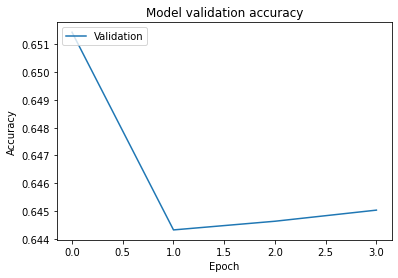

Accuracy on Test Data:
0.6548


In [42]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)


### Model 2

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 64)                1984      
                                                                 
 dense_125 (Dense)           (None, 128)               8320      
                                                                 
 dense_126 (Dense)           (None, 256)               33024     
                                                                 
 dense_127 (Dense)           (None, 256)               65792     
                                                                 
 dense_128 (Dense)           (None, 128)               32896     
                                                                 
 dense_129 (Dense)           (None, 64)                8256      
                                                                 
 dense_130 (Dense)           (None, 35)              

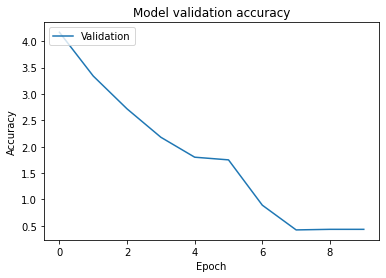

Accuracy on Test Data:
0.6548


In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])


##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 3

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 128)               3968      
                                                                 
 dense_135 (Dense)           (None, 128)               16512     
                                                                 
 dense_136 (Dense)           (None, 35)                4515      
                                                                 
Total params: 24,995
Trainable params: 24,995
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epoch 1/10
300/300 [==============================] - 51s 168ms/step - batch: 149.5000 - size: 1.0000 - loss: 5.2454 - accuracy: 0.6576 - val_loss: 2.6458 - val_accuracy: 0.6682
Epoch 2/10
300/300 [==============================] - 49s 163ms/step - batch: 149.5000 - 

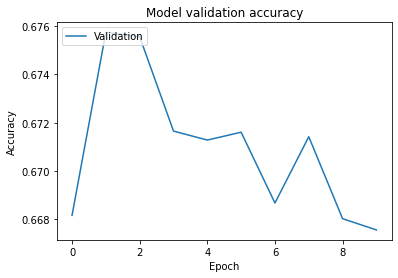

Accuracy on Test Data:
Tensor("mul_4:0", shape=(), dtype=float32)


In [68]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 4

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 64)                1984      
                                                                 
 dense_143 (Dense)           (None, 128)               8320      
                                                                 
 dense_144 (Dense)           (None, 128)               16512     
                                                                 
 dense_145 (Dense)           (None, 64)                8256      
                                                                 
 dense_146 (Dense)           (None, 35)                2275      
                                                                 
Total params: 37,347
Trainable params: 37,347
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epo

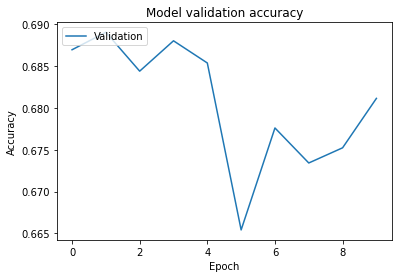

Accuracy on Test Data:
Tensor("mul_5:0", shape=(), dtype=float32)


In [70]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 5

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 128)               3968      
                                                                 
 dense_152 (Dense)           (None, 128)               16512     
                                                                 
 dense_153 (Dense)           (None, 128)               16512     
                                                                 
 dense_154 (Dense)           (None, 35)                4515      
                                                                 
Total params: 41,507
Trainable params: 41,507
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epoch 1/10
300/300 [==============================] - 42s 140ms/step - batch: 149.5000 - size: 1.0000 - loss: 3.7824 - accuracy: 0.6595

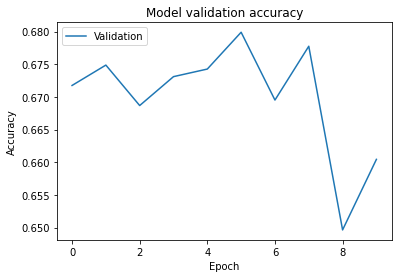

Accuracy on Test Data:
Tensor("mul_6:0", shape=(), dtype=float32)


In [72]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 6

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 128)               3968      
                                                                 
 dense_156 (Dense)           (None, 128)               16512     
                                                                 
 dense_157 (Dense)           (None, 128)               16512     
                                                                 
 dense_158 (Dense)           (None, 128)               16512     
                                                                 
 dense_159 (Dense)           (None, 35)                4515      
                                                                 
Total params: 58,019
Trainable params: 58,019
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epo

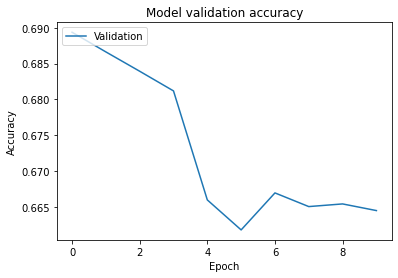

Accuracy on Test Data:
Tensor("mul_7:0", shape=(), dtype=float32)


In [73]:

# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 7

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 128)               3968      
                                                                 
 dense_161 (Dense)           (None, 256)               33024     
                                                                 
 dense_162 (Dense)           (None, 512)               131584    
                                                                 
 dense_163 (Dense)           (None, 512)               262656    
                                                                 
 dense_164 (Dense)           (None, 128)               65664     
                                                                 
 dense_165 (Dense)           (None, 35)                4515      
                                                                 
Total params: 501,411
Trainable params: 501,411
Non-t

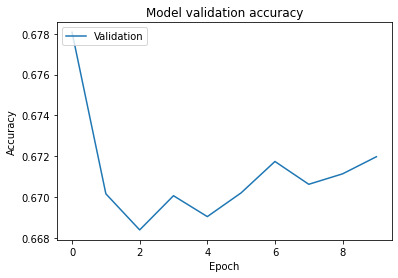

Accuracy on Test Data:
Tensor("mul_8:0", shape=(), dtype=float32)


In [74]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 8

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 256)               7936      
                                                                 
 dense_167 (Dense)           (None, 256)               65792     
                                                                 
 dense_168 (Dense)           (None, 256)               65792     
                                                                 
 dense_169 (Dense)           (None, 35)                8995      
                                                                 
Total params: 148,515
Trainable params: 148,515
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epoch 1/10
300/300 [==============================] - 41s 136ms/step - batch: 149.5000 - size: 1.0000 - loss: 3.3722 - accuracy: 0.65

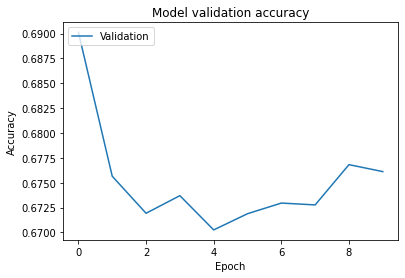

Accuracy on Test Data:
Tensor("mul_9:0", shape=(), dtype=float32)


In [75]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 9

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 128)               3968      
                                                                 
 dense_209 (Dense)           (None, 128)               16512     
                                                                 
 dense_210 (Dense)           (None, 256)               33024     
                                                                 
 dense_211 (Dense)           (None, 256)               65792     
                                                                 
 dense_212 (Dense)           (None, 128)               32896     
                                                                 
 dense_213 (Dense)           (None, 128)               16512     
                                                                 
 dense_214 (Dense)           (None, 35)              

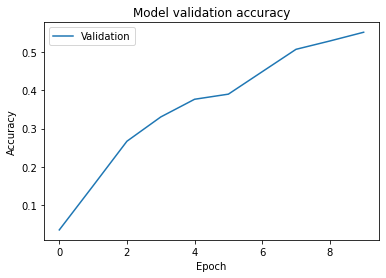

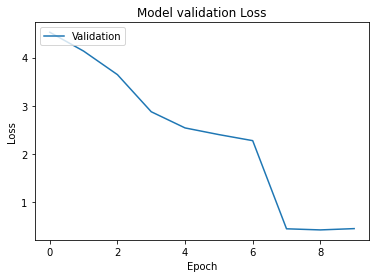

Accuracy on Test Data:
0.748


In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 10

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 512)               15872     
                                                                 
 dense_171 (Dense)           (None, 512)               262656    
                                                                 
 dense_172 (Dense)           (None, 35)                17955     
                                                                 
Total params: 296,483
Trainable params: 296,483
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples, validate on 703 samples
Epoch 1/10
300/300 [==============================] - 61s 202ms/step - batch: 149.5000 - size: 1.0000 - loss: 4.3507 - accuracy: 0.7446 - val_loss: 2.5052 - val_accuracy: 0.7655
Epoch 2/10
300/300 [==============================] - 64s 212ms/step - batch: 149.5000 

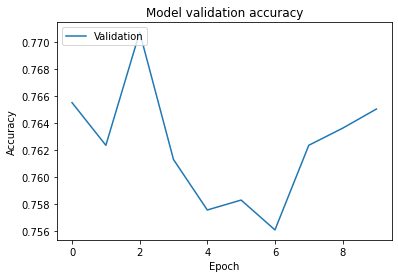

Accuracy on Test Data:
Tensor("mul_10:0", shape=(), dtype=float32)


In [76]:
# define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])

##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 11

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_201 (Dense)           (None, 64)                1984      
                                                                 
 dense_202 (Dense)           (None, 128)               8320      
                                                                 
 dense_203 (Dense)           (None, 256)               33024     
                                                                 
 dense_204 (Dense)           (None, 256)               65792     
                                                                 
 dense_205 (Dense)           (None, 128)               32896     
                                                                 
 dense_206 (Dense)           (None, 64)                8256      
                                                                 
 dense_207 (Dense)           (None, 35)              

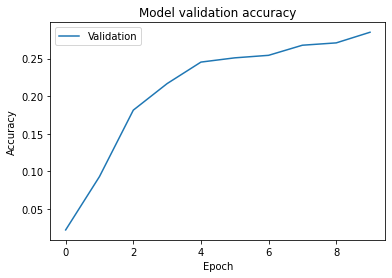

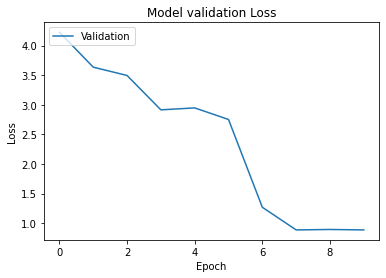

Accuracy on Test Data:
0.2548


In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 12

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 128)               3968      
                                                                 
 dense_227 (Dense)           (None, 128)               16512     
                                                                 
 dense_228 (Dense)           (None, 256)               33024     
                                                                 
 dense_229 (Dense)           (None, 256)               65792     
                                                                 
 dense_230 (Dense)           (None, 128)               32896     
                                                                 
 dense_231 (Dense)           (None, 128)               16512     
                                                                 
 dense_232 (Dense)           (None, 35)              

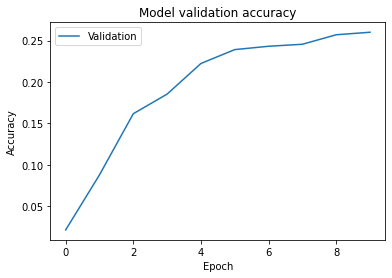

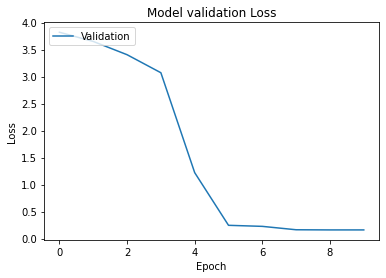

Accuracy on Test Data:
0.28


In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 13

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_233 (Dense)           (None, 128)               3968      
                                                                 
 dense_234 (Dense)           (None, 128)               16512     
                                                                 
 dense_235 (Dense)           (None, 128)               16512     
                                                                 
 dense_236 (Dense)           (None, 35)                4515      
                                                                 
Total params: 41,507
Trainable params: 41,507
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 703 samples
Epoch 1/10
1000/1000 [==============================] - 172s 172ms/step - batch: 499.5000 - size: 1.0000 - loss: 4.8289 - accuracy: 0.

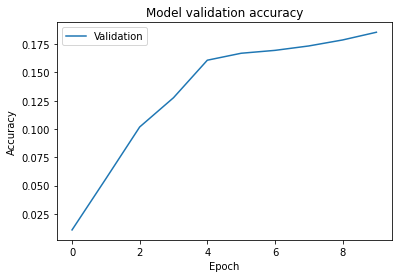

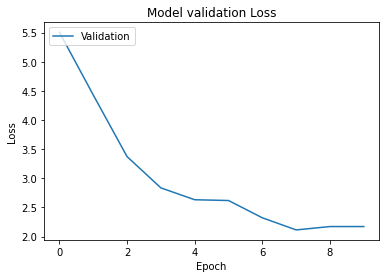

Accuracy on Test Data:
0.18


In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 14

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_244 (Dense)           (None, 64)                1984      
                                                                 
 dense_245 (Dense)           (None, 128)               8320      
                                                                 
 dense_246 (Dense)           (None, 256)               33024     
                                                                 
 dense_247 (Dense)           (None, 256)               65792     
                                                                 
 dense_248 (Dense)           (None, 128)               32896     
                                                                 
 dense_249 (Dense)           (None, 64)                8256      
                                                                 
 dense_250 (Dense)           (None, 35)              

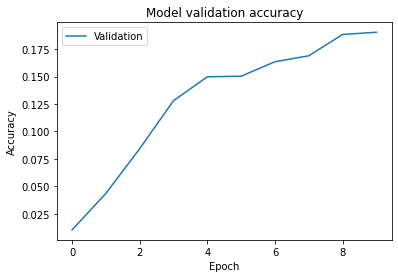

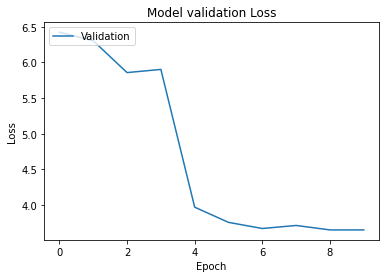

Accuracy on Test Data:
0.202


In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 15

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 64)                1984      
                                                                 
 dense_268 (Dense)           (None, 128)               8320      
                                                                 
 dense_269 (Dense)           (None, 256)               33024     
                                                                 
 dense_270 (Dense)           (None, 512)               131584    
                                                                 
 dense_271 (Dense)           (None, 256)               131328    
                                                                 
 dense_272 (Dense)           (None, 128)               32896     
                                                                 
 dense_273 (Dense)           (None, 64)              

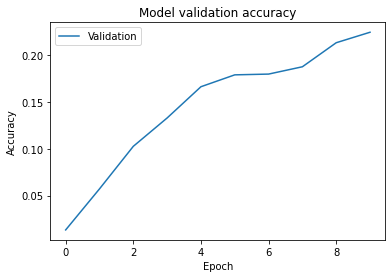

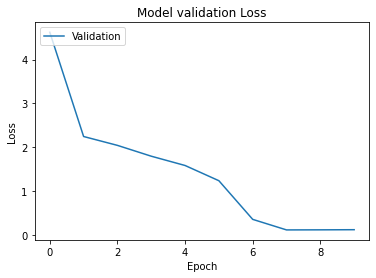

Accuracy on Test Data:
0.1588


In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 16

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_289 (Dense)           (None, 64)                1984      
                                                                 
 dense_290 (Dense)           (None, 128)               8320      
                                                                 
 dense_291 (Dense)           (None, 256)               33024     
                                                                 
 dense_292 (Dense)           (None, 256)               65792     
                                                                 
 dense_293 (Dense)           (None, 128)               32896     
                                                                 
 dense_294 (Dense)           (None, 64)                8256      
                                                                 
 dense_295 (Dense)           (None, 35)              

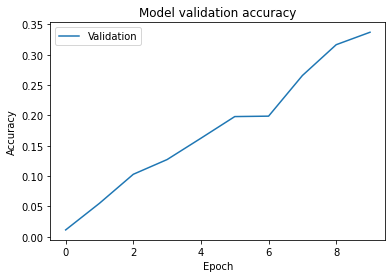

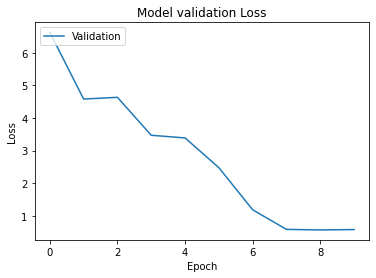

Accuracy on Test Data:
0.3588


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 17

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 64)                1984      
                                                                 
 dense_311 (Dense)           (None, 128)               8320      
                                                                 
 dense_312 (Dense)           (None, 256)               33024     
                                                                 
 dense_313 (Dense)           (None, 512)               131584    
                                                                 
 dense_314 (Dense)           (None, 128)               65664     
                                                                 
 dense_315 (Dense)           (None, 64)                8256      
                                                                 
 dense_316 (Dense)           (None, 35)              

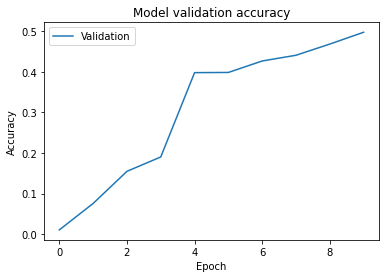

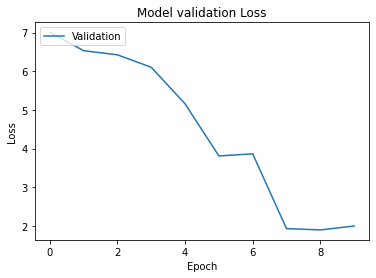

Accuracy on Test Data:
0.4084


In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 18

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_317 (Dense)           (None, 128)               3968      
                                                                 
 dense_318 (Dense)           (None, 128)               16512     
                                                                 
 dense_319 (Dense)           (None, 128)               16512     
                                                                 
 dense_320 (Dense)           (None, 35)                4515      
                                                                 
Total params: 41,507
Trainable params: 41,507
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 703 samples
Epoch 1/10
1000/1000 [==============================] - 152s 152ms/step - batch: 499.5000 - size: 1.0000 - loss: 5.8571 - accuracy: 0.

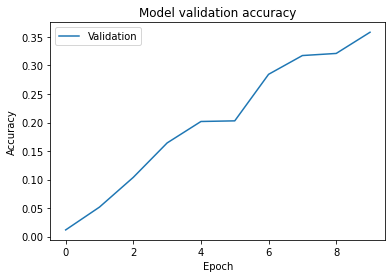

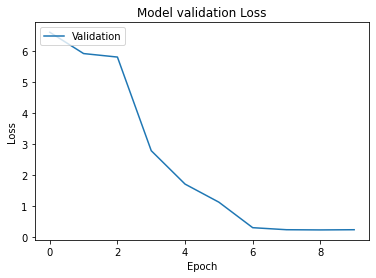

Accuracy on Test Data:
0.3384


In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    
    tf.keras.layers.Dense(128, activation='sigmoid'),
    
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

### Model 19

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_331 (Dense)           (None, 128)               3968      
                                                                 
 dense_332 (Dense)           (None, 128)               16512     
                                                                 
 dense_333 (Dense)           (None, 128)               16512     
                                                                 
 dense_334 (Dense)           (None, 128)               16512     
                                                                 
 dense_335 (Dense)           (None, 35)                4515      
                                                                 
Total params: 58,019
Trainable params: 58,019
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 703 samples
Ep

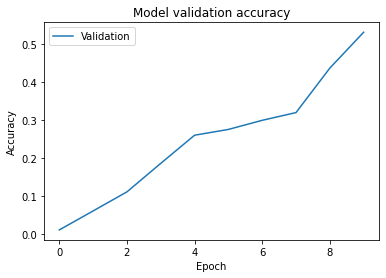

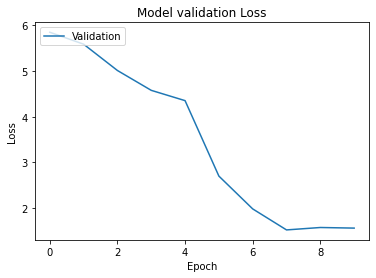

Accuracy on Test Data:
0.394


In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(35, activation='softmax')
])
##Setting up early stopping to avoid overfittting
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

##Compiling the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
model.build((ln,1))
#input_shape = (x_train.shape[1], x_train.shape[2], 1)

##Fitting Training data on model
history=model.fit(x_train,y_train,epochs=10, batch_size = 64, steps_per_epoch = 1000,
                  validation_data = (x_val,y_val),validation_steps = 100,callbacks=[es_callback])


##Plotting Accuracies and Losses
print(len(history.history['val_accuracy']))
print((history.history['val_accuracy']))
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


##Evaluation on test data
print("Accuracy on Test Data:")
y_pred = model.predict(x_test,steps = 1)
k = accuracy(y_test, y_pred)
k = k.numpy()
print(k)
accuracy_test.append(k)

## Summary of Different Architectures:


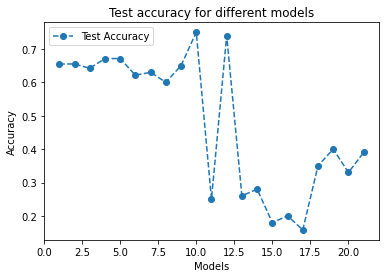

<Figure size 7200x7200 with 0 Axes>

In [16]:
xlab = []
for i in range(1,len(accuracy_test) + 1):
    xlab.append(i)

plt.plot(xlab,accuracy_test,linestyle='--', marker='o',)
plt.title('Test accuracy for different models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(['Test Accuracy'], loc='upper left')
plt.figure(figsize=(100,100))
plt.show()

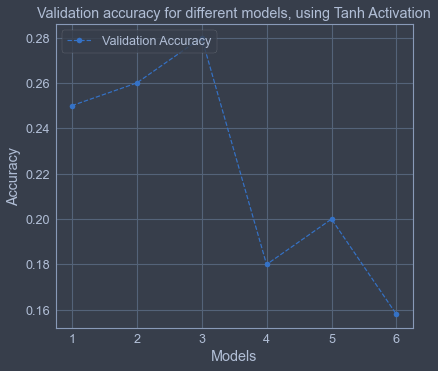

<Figure size 7200x7200 with 0 Axes>

In [21]:

xlab = []
for i in range(1,len(accuracy_tanh) + 1):
    xlab.append(i)

plt.plot(xlab,accuracy_tanh,linestyle='--', marker='o',)
plt.title('Validation accuracy for different models, using Tanh Activation')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.figure(figsize=(100,100))
plt.show()

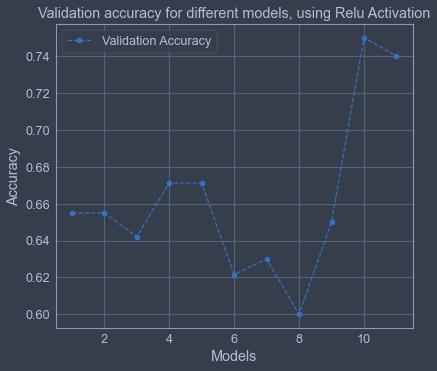

<Figure size 7200x7200 with 0 Axes>

In [22]:

xlab = []
for i in range(1,len(accuracy_relu) + 1):
    xlab.append(i)

plt.plot(xlab,accuracy_relu,linestyle='--', marker='o',)
plt.title('Validation accuracy for different models, using Relu Activation')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.figure(figsize=(100,100))
plt.show()

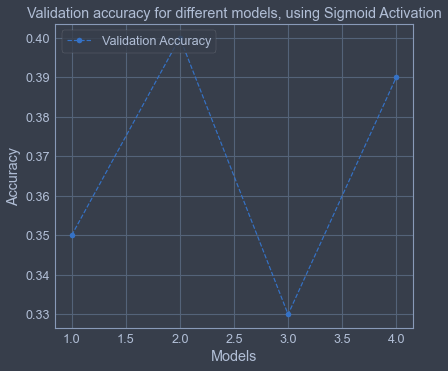

<Figure size 7200x7200 with 0 Axes>

In [19]:

xlab = []
for i in range(1,len(accuracy_sig ) + 1):
    xlab.append(i)

plt.plot(xlab,accuracy_sig ,linestyle='--', marker='o',)
plt.title('Validation accuracy for different models, using Sigmoid Activation')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.figure(figsize=(100,100))
plt.show()